# Paper plots

Within this notebook, we create the plots presented in the paper.

In [1]:
import matplotlib.transforms as mtransforms
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pickle
from matplotlib.lines import Line2D

plt.rcParams['text.latex.preamble']=r"\usepackage{lmodern}"
#Options
params = {'text.usetex' : True,
          'font.size' : 10,
          'font.family' : 'lmodern',
          'svg.fonttype': 'none'
          }
plt.rcParams.update(params) 

# QSVT plots

/var/folders/by/tjkhpdvj401cj92bnwvg228h0000gn/T/ipykernel_52862/3790505496.py:98: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


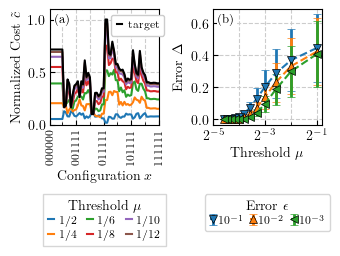

In [2]:
# load data
with open('data/QSVT_results_dict.pkl', 'rb') as f:
    QSVT_results_dict = pickle.load(f)

# sort data
QSVT_results_epsilon = {}
error_dict = {}
for key, el in QSVT_results_dict.items():
    kappa, epsilon = key
    mu = 1/kappa
    expected_amplitudes, costs_scaled, C_p, degree = el
    c_max = np.max(costs_scaled)

    error = np.abs(costs_scaled/c_max - expected_amplitudes/c_max)


    if epsilon in error_dict.keys():
        error_dict[epsilon]["qsvt_amps_norm"].append(expected_amplitudes/c_max)
        error_dict[epsilon]["cost_amps_norm"].append(costs_scaled/c_max)
        error_dict[epsilon]["error_mean"].append(np.mean(error))
        error_dict[epsilon]["error_std"].append(np.std(error))
        error_dict[epsilon]["error_max"].append(np.max(error))
        error_dict[epsilon]["error_min"].append(np.min(error))
        error_dict[epsilon]["degree"].append(degree)
        error_dict[epsilon]["mu"].append(mu)
    else:
        error_dict[epsilon] = {
            "qsvt_amps_norm": [expected_amplitudes/c_max],
            "cost_amps_norm": [costs_scaled/c_max],
            "error_mean": [np.mean(error)],
            "error_std": [np.std(error)],
            "error_max": [np.max(error)],
            "error_min": [np.min(error)],
            "degree": [degree],
            "mu": [mu]
        }

    if epsilon in QSVT_results_epsilon.keys():
        QSVT_results_epsilon[epsilon]["qsvt_amps_norm"].append(expected_amplitudes/c_max)
        QSVT_results_epsilon[epsilon]["cost_amps_norm"].append(costs_scaled/c_max)
        QSVT_results_epsilon[epsilon]["mu"].append(mu)
        QSVT_results_epsilon[epsilon]["degree"].append(degree)
    else:
        QSVT_results_epsilon[epsilon] = {
            "qsvt_amps_norm": [expected_amplitudes/c_max],
            "cost_amps_norm": [costs_scaled/c_max],
            "mu": [mu],
            "degree": [degree]
        }

# plot data
cmap = plt.get_cmap('turbo')

fig, ax = plt.subplots(1, 2, figsize=(3.5, 1.5), gridspec_kw={'wspace': 0.5})
for i in range(len(QSVT_results_epsilon[epsilon]["cost_amps_norm"])):
    ax[0].plot(np.real(QSVT_results_epsilon[epsilon]["qsvt_amps_norm"][i]) , label=fr"$1/{int(1/QSVT_results_epsilon[epsilon]["mu"][i])}$")
    if QSVT_results_epsilon[epsilon]["mu"][i] < 1/10:
        break
targ,  = ax[0].plot(QSVT_results_epsilon[epsilon]["cost_amps_norm"][0], ls="-", c='black')
linestyle_legend = [
    Line2D([0], [0], color='black', linestyle='solid', label='target')
]
legend1 = ax[0].legend(handles=linestyle_legend, loc='upper right', borderpad=0.5, handlelength=0.5, labelspacing=0.3, prop={'size':8}, columnspacing=0.9, handletextpad=0.5, bbox_to_anchor=(1.1, 1), framealpha=1)
handles, labels = ax[0].get_legend_handles_labels()
legend2 = ax[0].legend(handles=handles, loc='lower center', fancybox=False, ncol=3, bbox_to_anchor=(0.5, -1.1), title=r"Threshold $\mu$", borderpad=0.5, handlelength=0.5, labelspacing=0.3, prop={'size':8}, columnspacing=0.9, handletextpad=0.5)

ax[0].add_artist(legend1)

ax[0].set_xlim([0, 63])
ax[0].set_ylim([0, 1.1])
ax[0].set_xticks([0, 15, 31, 47, 63], ["000000", "001111", "011111", "101111", "111111"], rotation=90, fontsize=8, minor=False)#, ha='right')
ax[0].set_xticks([7, 23, 39, 55], minor=True)
ax[0].set_ylabel(r"Normalized Cost $\tilde{c}$")
ax[0].set_xlabel(r"Configuration $x$")
ax[0].tick_params(which='both', direction="in")
ax[0].grid(True, ls="--", c='0.8', which='both')

marker_dict={
    0: "v",
    1: "^",
    2: "<"
}

for i, epsilon in enumerate(error_dict.keys()):
    ax[1].errorbar(error_dict[epsilon]["mu"], error_dict[epsilon]["error_mean"], yerr=error_dict[epsilon]["error_std"], label=rf"$10^{'{'+str(int(np.log10(epsilon)))+'}'}$", marker=marker_dict[i], linestyle="--", capsize=3, capthick=2, elinewidth=2, mec="black", mew=0.5)
ax[1].set_ylabel(r"Error $\Delta$")
ax[1].set_xlabel(r"Threshold $\mu$")
ax[1].tick_params(which='both', direction="in")
ax[1].grid(True, ls="--", c='0.8', which='both')
ax[1].legend(loc="lower center", borderpad=0.5, bbox_to_anchor=(0.5, -0.97), handlelength=0.5, labelspacing=0.3, prop={'size':8}, title=r"Error $\epsilon$", ncol=3, columnspacing=0.6, handletextpad=0.3)
ax[1].set_xscale('log', base=2)
ax[1].set_xticks([1/32, 1/8, 1/2])
ax[1].set_xticks([1/16, 1/4], labels=["", ""], minor=True)
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[0].text(0.3, 0.78, "(a)", transform=ax[0].transAxes + trans, fontsize=9, va='bottom', bbox=dict(facecolor='white', edgecolor='none', boxstyle='square,pad=0.1'))
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[1].text(0.3, 0.78, "(b)", transform=ax[1].transAxes + trans, fontsize=9, va='bottom', bbox=dict(facecolor='white', edgecolor='none', boxstyle='square,pad=0.1'))
plt.tight_layout()
plt.savefig("paper_plots/QSVT_sim.pdf" , bbox_inches="tight", transparent=True)

plt.show()

# QAOA and QuSO plots

In [3]:
# load data
with open('data/QAOA_data.pkl', 'rb') as f:
    QAOA_data = pickle.load(f) # cost_list, params_list, probs, probs_initial, approx_ratio

with open('data/quso_cost_curvefit.pkl', 'rb') as f:
    quso_cost_curvefit = pickle.load(f)

costs = np.load("data/costs.npy")

with open('/Users/Q556220/Projects/QuSO_Cooling_System/Code/Plotting/data/cost_landscapes.pkl', 'rb') as f:
    cost_landscapes = pickle.load(f)

with open('/Users/Q556220/Projects/QuSO_Cooling_System/Code/Plotting/data/QAOA_cost_landscape.pkl', 'rb') as f:
    qaoa_cost_landscape = pickle.load(f)

with open('/Users/Q556220/Projects/QuSO_Cooling_System/Code/Plotting/data/quso_probs.pkl', 'rb') as f:
    QuSO_probs = pickle.load(f)

# sort data
r = []
p = []
for depth in QAOA_data.keys():
    r.append(QAOA_data[depth][-1])
    p.append(depth)
cost_min = min(costs)

/var/folders/by/tjkhpdvj401cj92bnwvg228h0000gn/T/ipykernel_52862/2544859339.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


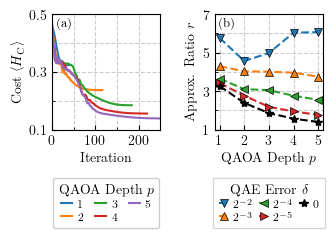

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(3.5, 1.5), gridspec_kw={'wspace': 0.5})

for depth in QAOA_data.keys():
    ax[0].plot(QAOA_data[depth][0], label=rf"${depth}$")
ax[0].legend(loc='lower center', bbox_to_anchor=(0.5, -0.9), borderpad=0.5, handlelength=1, labelspacing=0.3, columnspacing=1, handletextpad=0.5, prop={'size':8}, framealpha=1, title=r"QAOA Depth $p$", ncol=3)
ax[0].set_xlim([0, 250])
ax[0].set_xticks([0, 100, 200])
ax[0].set_xticks([50, 150, 250], minor=True)
ax[0].set_ylim([0.1, 0.5])
ax[0].set_yticks([0.1, 0.3, 0.5])
ax[0].set_yticks([0.2, 0.4], minor=True)
ax[0].set_ylabel(r"Cost $\langle H_\mathrm{C} \rangle$")
ax[0].set_xlabel(r"Iteration")
ax[0].tick_params(which='both', direction="in")
ax[0].grid(True, ls="--", c='0.8', which='both')

# plt.savefig("/Users/Q556220/Projects/QuSO_Cooling_System/Code/Plotting/Presentation_plots/qsvt_T1.pdf", bbox_inches="tight", transparent=True)
marker_dict={
    2: "v",
    3: "^",
    4: "<",
    5: ">"
}
for n_phase_qubits in [2, 3, 4, 5]:
    label = r"$2^{-" + str(n_phase_qubits) + "}$"
    ax[1].plot(p, np.array(quso_cost_curvefit[n_phase_qubits])/cost_min, marker=marker_dict[n_phase_qubits], linestyle="dashed", label=label, mec="black", mew=0.5)
ax[1].plot(p, r, marker='*', linestyle="dashed", label=r"$0$", color="black")
# ax.set_xlim([1, 5])
ax[1].set_ylim([1, 7])
ax[1].set_yticks([1, 3, 5, 7])
ax[1].set_yticks([2, 4, 6], minor=True)
ax[1].set_xticks([1, 2, 3, 4, 5])
leg1 = ax[1].legend(loc='lower center', fancybox=False,  ncol=3, bbox_to_anchor=(0.5, -0.9), borderpad=0.5, handlelength=1, labelspacing=0.3, prop={'size':8}, title=r"QAE Error $\delta$", columnspacing=0.6, handletextpad=0.3)
ax[1].set_ylabel(r"Approx. Ratio $r$")
ax[1].set_xlabel(r"QAOA Depth $p$")
ax[1].tick_params(which='both', direction="in")
ax[1].grid(True, ls="--", c='0.8', which='both')

trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[0].text(0.3, 0.78, "(a)", transform=ax[0].transAxes + trans, fontsize=9, va='bottom', bbox=dict(facecolor='white', edgecolor='none', boxstyle='square,pad=0.1'))
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[1].text(0.3, 0.78, "(b)", transform=ax[1].transAxes + trans, fontsize=9, va='bottom', bbox=dict(facecolor='white', edgecolor='none', boxstyle='square,pad=0.1'))
plt.tight_layout()
plt.savefig("paper_plots/QAOA_QuSO_cost.pdf", bbox_inches="tight", transparent=True)

plt.show()

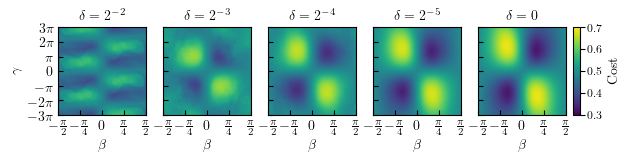

In [5]:
# --- Compute global vmin/vmax ---
all_costs = []
for key, vals in cost_landscapes.items():
    cost_surface_, X, Y = vals
    all_costs.append(cost_surface_)
# Also add the QAOA cost landscape:
all_costs.append(qaoa_cost_landscape[0])
global_min = np.round(np.min([np.min(cs) for cs in all_costs]), 1)
global_max = np.round(np.max([np.max(cs) for cs in all_costs]), 1)

# --- Create subplots ---
fig, ax = plt.subplots(1, 5, figsize=(7, 1.5), 
                       gridspec_kw={'wspace': 0.2, 'hspace': 0.2}, 
                       sharey=True)

# --- Plot the cost landscapes for the first four axes ---
for i, (key, vals) in enumerate(cost_landscapes.items()):
    cost_surface_, X, Y = vals
    title = r"$\delta=2^{-" + str(key) + "}$"
    ax[i].set_title(title, fontsize=10)
    surf = ax[i].contourf(X, Y, cost_surface_, levels=200, cmap="viridis", vmin=global_min, vmax=global_max)
    surf.set_edgecolor("face")  
    # surf.set_rasterized(True)
    ax[i].set_xlabel(r"$\beta$")
    ax[i].set_xticks([-np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2],
                     [r"$-\frac{\pi}{2}$", r"$-\frac{\pi}{4}$", "0", r"$\frac{\pi}{4}$", r"$\frac{\pi}{2}$"])
    ax[i].set_yticks([-3*np.pi, -2*np.pi, -np.pi, 0, np.pi, 2*np.pi, 3*np.pi],
                     [r"$-3\pi$", r"$-2\pi$", r"$-\pi$", "0", r"$\pi$", r"$2\pi$", r"$3\pi$"])
    ax[i].tick_params(which='both', direction="in")
    ax[i].set_box_aspect(1)

# --- Plot the QAOA cost landscape in the last subplot ---
cost_surface_, X, Y = qaoa_cost_landscape
surf = ax[-1].contourf(X, Y, cost_surface_, levels=200, cmap="viridis", vmin=global_min, vmax=global_max)
surf.set_edgecolor("face")  
# surf.set_rasterized(True)
ax[-1].set_xlabel(r"$\beta$")
ax[-1].set_xticks([-np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2],
                  [r"$-\frac{\pi}{2}$", r"$-\frac{\pi}{4}$", "0", r"$\frac{\pi}{4}$", r"$\frac{\pi}{2}$"])
ax[-1].set_yticks([-3*np.pi, -2*np.pi, -np.pi, 0, np.pi, 2*np.pi, 3*np.pi],
                  [r"$-3\pi$", r"$-2\pi$", r"$-\pi$", "0", r"$\pi$", r"$2\pi$", r"$3\pi$"])
ax[-1].tick_params(which='both', direction="in")
ax[-1].set_title(r"$\delta=0$", fontsize=10)
ax[0].set_ylabel(r"$\gamma$")
ax[-1].set_box_aspect(1)

# --- Add a vertical colorbar to the right of the plots ---
fig.subplots_adjust(right=0.85)  # Adjust the right boundary of the plot area
# Get the position of one subplot (e.g., the first one)
pos = ax[0].get_position()  # This returns a Bbox with .x0, .y0, .width, and .height

# Alternatively, you might want to position the colorbar right next to the last subplot:
last_pos = ax[-1].get_position()

# Define the new axes for the colorbar using the last subplot's right edge and the same y0 and height as ax[0]
cbar_ax = fig.add_axes([last_pos.x1 + 0.01, pos.y0, 0.01, pos.height])
norm = matplotlib.colors.Normalize(vmin=global_min, vmax=global_max)
sm = matplotlib.cm.ScalarMappable(norm=norm, cmap="viridis")
cbar = fig.colorbar(sm, cax=cbar_ax, orientation="vertical", ticks=[0.3, 0.4, 0.5, 0.6, 0.7], label=r"Cost")
cbar.ax.tick_params(labelsize=8, pad=2)  # Adjust the pad parameter
plt.savefig("paper_plots/cost_landscapes.pdf", bbox_inches="tight", transparent=True)
plt.show()

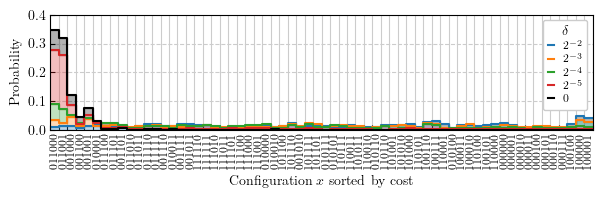

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

# --- Your data and setup ---
fig, ax = plt.subplots(figsize=(7, 1.5))
probs = QAOA_data[5][2]  # (assumed defined elsewhere)

bitstrings = [''.join(seq) for seq in itertools.product('01', repeat=6)]
sorted_indices = sorted(range(len(costs)), key=lambda i: costs[i])
sorted_probs = [probs[i] for i in sorted_indices]
sorted_bitstrings = [bitstrings[i] for i in sorted_indices]

# --- Build the step curves and store their data ---
# We will collect each curve as a tuple: (x, y, color, label)
curves = []

# Plot the four QuSO curves (for each n_phase_qubits)
n_phase_qubits_list = [2, 3, 4, 5]
for i, n_phase_qubits in enumerate(n_phase_qubits_list):
    probs_ = QuSO_probs[5][i]  # (assumed defined elsewhere)
    # Reorder according to cost
    sorted_probs_ = [probs_[j] for j in sorted_indices]
    # For a proper step plot, repeat the first and last points:
    sorted_probs_.insert(0, sorted_probs_[0])
    sorted_probs_.insert(-1, sorted_probs_[-1])
    x_vals = np.arange(-1, len(sorted_probs_) - 1)
    label = r"$2^{-" + str(n_phase_qubits) + "}$"
    # Use ax.step and store the returned Line2D object to later get its color
    line = ax.step(x_vals, sorted_probs_, label=label, where="mid")[0]
    curves.append((x_vals, np.array(sorted_probs_), line.get_color()))

# Plot the QAOA curve
# Repeat first and last point for consistency:
sorted_probs.insert(0, sorted_probs[0])
sorted_probs.insert(-1, sorted_probs[-1])
x_vals = np.arange(-1, len(sorted_probs) - 1)
line = ax.step(x_vals, sorted_probs, linestyle="-", color="black", 
               label=r"$0$", where="mid")[0]
curves.append((x_vals, np.array(sorted_probs), line.get_color()))

# --- Fill between the step curves ---
# We fill between each adjacent pair using the color of the upper (i.e. later) curve.
# (Note: if the curves intersect, a more careful segmentation is needed.)
for i in range(len(curves) - 1):
    x_vals, y_lower, _ = curves[i]
    # Use the next curve’s data and color:
    _, y_upper, upper_color = curves[i + 1]
    ax.fill_between(x_vals, y_lower, y_upper, step="mid", color=upper_color, alpha=0.3)

# Optionally, fill below the lowest curve down to zero:
x_vals, y_low, low_color = curves[0]
ax.fill_between(x_vals, 0, y_low, step="mid", color=low_color, alpha=0.3)

# --- Finalize your plot ---
ax.set_ylabel("Probability")
ax.set_xlabel(r"Configuration $x$ sorted by cost")
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
ax.set_xticks(np.arange(len(sorted_bitstrings) + 1) - 0.5, [""] * (len(sorted_bitstrings) + 1))
ax.set_xticks(ticks=range(len(sorted_bitstrings)), labels=sorted_bitstrings, rotation=90, fontsize=8, minor=True)
ax.tick_params('both', length=0, width=0, which='minor')
ax.grid(True, ls='-', c='0.8', which='major', axis="x")
ax.grid(True, ls='--', c='0.8', which='major', axis="y")
ax.set_axisbelow(True)
ax.set_xlim([-0.5, 63.5])
ax.set_ylim([0, 0.4])
ax.tick_params(which='both', direction="in")
ax.legend(loc="upper right", bbox_to_anchor=(1, 1), borderpad=0.5, handlelength=0.5, labelspacing=0.3, prop={'size':8}, framealpha=1, title=r"$\delta$")

plt.savefig("/Users/Q556220/Projects/QuSO_Cooling_System/Code/Plotting/Paper_plots/QuSO_probs.pdf", bbox_inches="tight", transparent=True)
plt.show()
